In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('train.csv')
print('Data shape: ', data.shape)
data.head()

Data shape:  (282451, 9)


,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size
0,26,92,87235.57,False,61.10,3.796,136.213613,7.767,152513
1,34,22,5945.97,False,53.11,3.480,128.616064,10.398,158114
2,21,28,1219.89,False,50.43,2.708,211.265543,8.163,140167
3,8,9,11972.71,False,75.32,2.582,214.878556,6.315,155078
4,19,55,8271.82,False,58.81,4.029,138.106581,8.150,203819


In [5]:
data.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size
count,282451.000000,282451.000000,282451.000000,282451.000000,282451.000000,282451.000000,282451.000000,282451.000000
mean,22.193166,44.286138,15983.429692,60.113640,3.360300,171.207802,7.968098,136730.073220
std,12.782138,30.503641,22661.092494,18.446485,0.458602,39.160808,1.868070,61002.319363
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.330000,46.780000,2.932000,132.022667,6.891000,93638.000000
50%,22.000000,38.000000,7616.550000,62.150000,3.452000,182.350989,7.866000,140167.000000
75%,33.000000,74.000000,20245.745000,74.290000,3.737000,212.464799,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,227.232807,14.313000,219622.000000


In [4]:
data.isnull().sum()

Store           0
Dept            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Size            0
dtype: int64

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='Weekly_Sales', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Weekly Sales')

Text(0.5, 0, 'Weekly Sales')

Text(0, 0.5, 'Frequency')

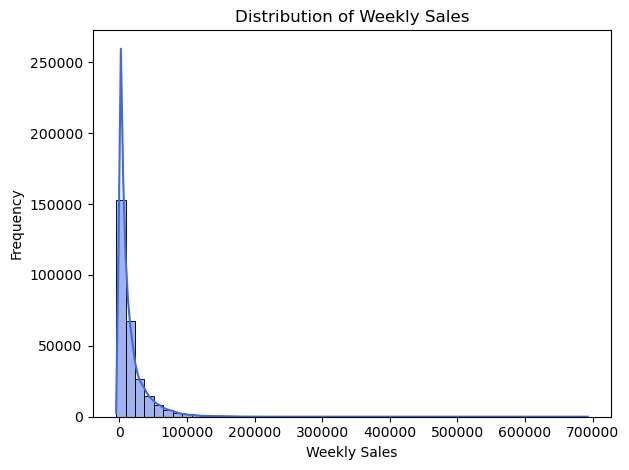

In [29]:
plt.figure()
sns.histplot(data['Weekly_Sales'], kde=True, bins=50, color="royalblue")
plt.title("Distribution of Weekly Sales")
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='Temperature', ylabel='Weekly_Sales'>

Text(0.5, 1.0, 'Weekly Sales vs Temperature')

Text(0.5, 0, 'Temperature (F)')

Text(0, 0.5, 'Weekly Sales')

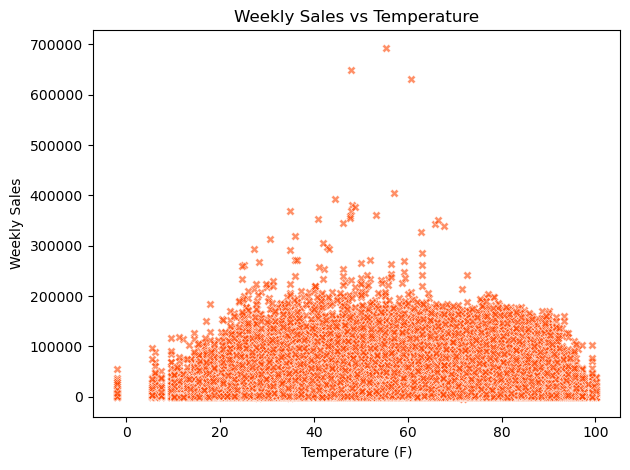

In [34]:
plt.figure()
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=data, alpha=0.6, color="orangered", marker='X')
plt.title("Weekly Sales vs Temperature")
plt.xlabel("Temperature (F)")
plt.ylabel("Weekly Sales")
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='Fuel_Price', ylabel='Weekly_Sales'>

Text(0.5, 1.0, 'Weekly Sales vs Fuel Price')

Text(0.5, 0, 'Fuel Price ($)')

Text(0, 0.5, 'Weekly Sales')

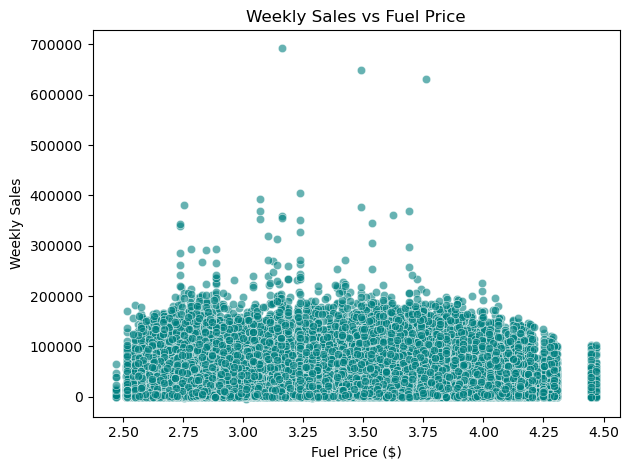

In [32]:
plt.figure()
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=data, alpha=0.6, color="teal")
plt.title("Weekly Sales vs Fuel Price")
plt.xlabel("Fuel Price ($)")
plt.ylabel("Weekly Sales")
plt.tight_layout()
plt.show()

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

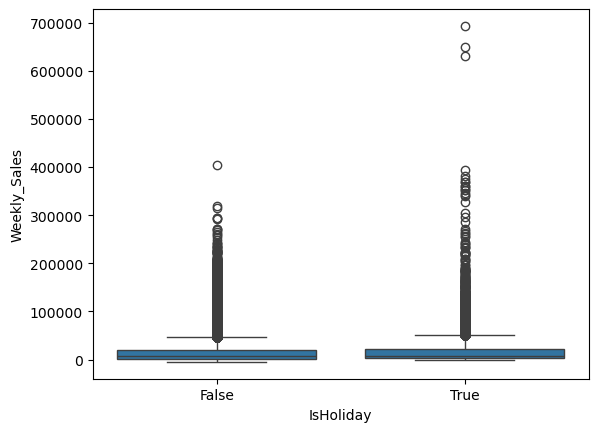

In [23]:
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=data)

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='Size', ylabel='Weekly_Sales'>

Text(0.5, 1.0, 'Weekly Sales vs Store Size')

Text(0.5, 0, 'Store Size')

Text(0, 0.5, 'Weekly Sales')

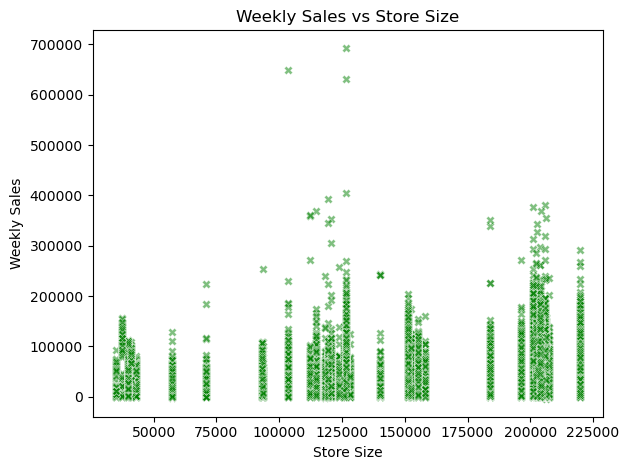

In [35]:
plt.figure()
sns.scatterplot(x='Size', y='Weekly_Sales', data=data, alpha=0.5, color="green", marker='X')
plt.title("Weekly Sales vs Store Size")
plt.xlabel("Store Size")
plt.ylabel("Weekly Sales")
plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

C:\Users\Ken\AppData\Local\Temp\ipykernel_9932\609175347.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='IsHoliday', y='Weekly_Sales', palette="pastel", linewidth=2)


<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

Text(0.5, 1.0, 'Weekly Sales by Store Type')

Text(0.5, 0, 'Store Type')

Text(0, 0.5, 'Weekly Sales')

([0, 1], [Text(0, 0, 'False'), Text(1, 0, 'True')])

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.]),
 [Text(0, -100000.0, '−100000'),
  Text(0, 0.0, '0'),
  Text(0, 100000.0, '100000'),
  Text(0, 200000.0, '200000'),
  Text(0, 300000.0, '300000'),
  Text(0, 400000.0, '400000'),
  Text(0, 500000.0, '500000'),
  Text(0, 600000.0, '600000'),
  Text(0, 700000.0, '700000'),
  Text(0, 800000.0, '800000')])

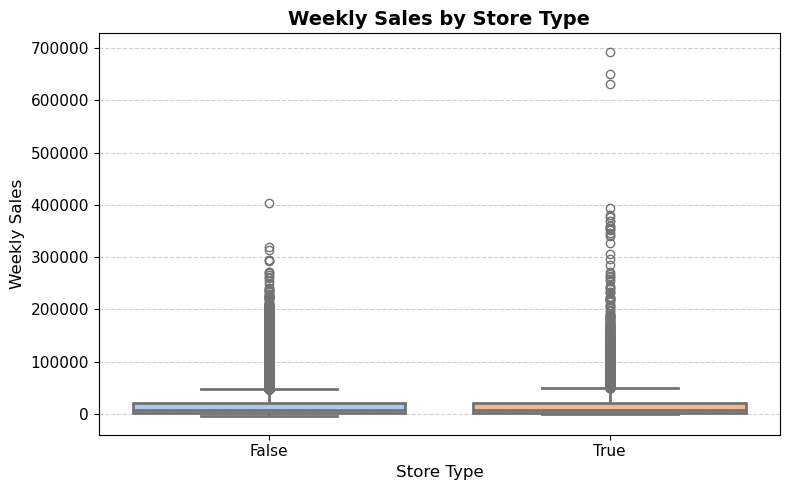

In [40]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='IsHoliday', y='Weekly_Sales', palette="pastel", linewidth=2)

plt.title("Weekly Sales by Store Type", fontsize=14, fontweight='bold')
plt.xlabel("Store Type", fontsize=12)
plt.ylabel("Weekly Sales", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


In [41]:
data['IsHoliday'] = data['IsHoliday'].astype(int)

ExtraTreesClassifier()

[0.52458981 0.00386653 0.01038863 0.00131092 0.03611379 0.03642857
 0.19050905 0.1967927 ]


<Axes: >

Text(0.5, 1.0, 'Top 5 Feature Importances')

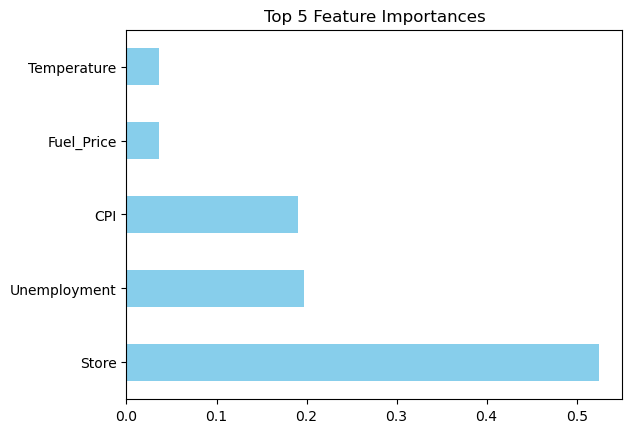

In [45]:
X = data.iloc[:, 0:8] 
y = data.iloc[:, -1]

model = ExtraTreesClassifier()
model.fit(X, y)

print(model.feature_importances_) 
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(5).plot(kind='barh', color='skyblue')
plt.title("Top 5 Feature Importances")
plt.show()

        Feature         Score
6           CPI  89104.478683
0         Store  49013.013955
7  Unemployment  18836.627338
4   Temperature   3933.794800
5    Fuel_Price   3412.353143


C:\Users\Ken\AppData\Local\Temp\ipykernel_9932\1612540823.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=scores.nlargest(5, 'Score'), x='Score', y='Feature', palette="mako")


<Axes: xlabel='Score', ylabel='Feature'>

Text(0.5, 1.0, 'Top 5 Features by Chi-Square Test')

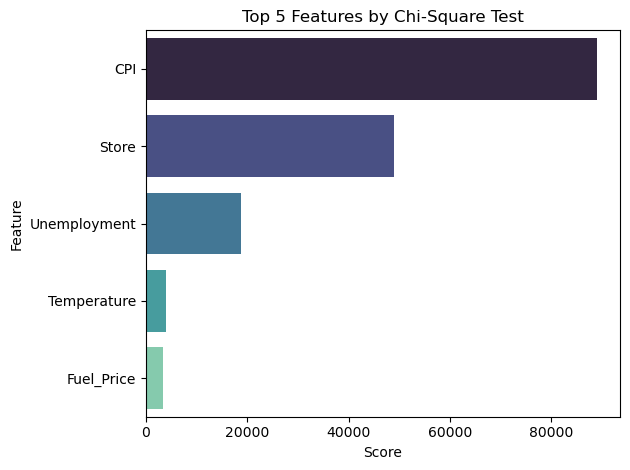

In [51]:
data['IsHoliday'] = data['IsHoliday'].astype(int)

X = data.iloc[:, 0:8]
y = data.iloc[:, -1]

# Make all X values non-negative (0 to 1 scaling)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply Chi2 feature selection
selector = SelectKBest(score_func=chi2, k=5)
fit = selector.fit(X_scaled, y)

# Display top 5 features
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
scores = pd.concat([dfcolumns, dfscores], axis=1)
scores.columns = ['Feature', 'Score']

print(scores.nlargest(5, 'Score'))

# Plot
sns.barplot(data=scores.nlargest(5, 'Score'), x='Score', y='Feature', palette="mako")
plt.title("Top 5 Features by Chi-Square Test")
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Feature Correlation Heatmap')

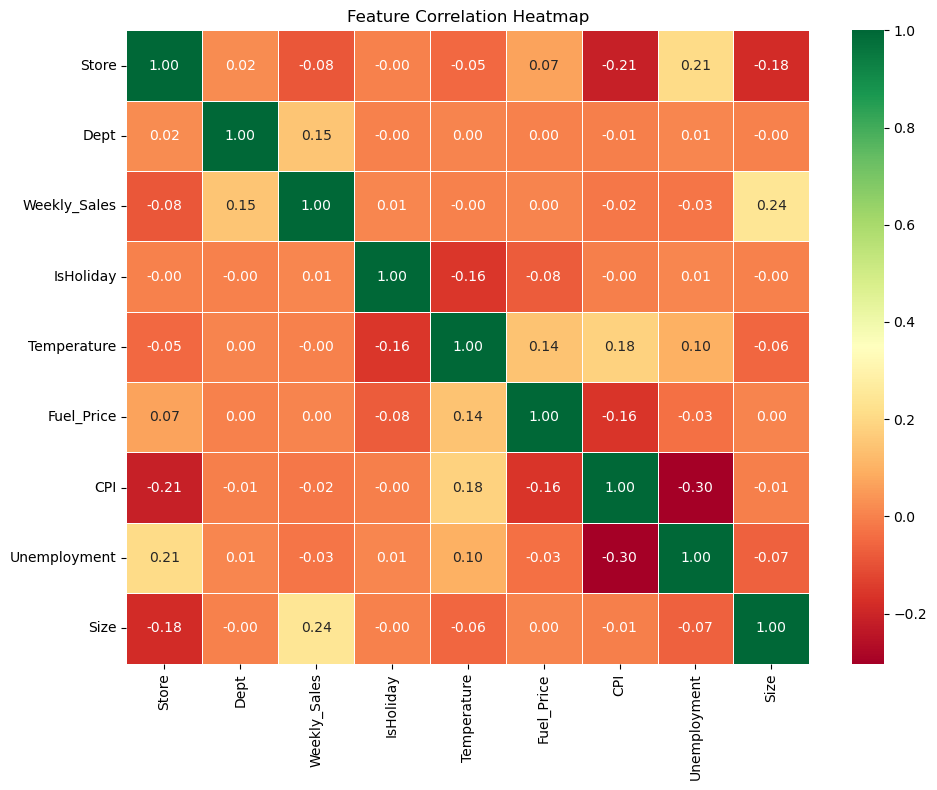

In [47]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


In [57]:


# Load dataset
data = pd.read_csv("train.csv")

# Convert boolean to int
data['IsHoliday'] = data['IsHoliday'].astype(int)

# Define features and target
X = data[['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
y = data['Size']

# Split into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Model Trained Successfully!")
print(f"📉 Mean Squared Error: {mse:.2f}")
print(f"📊 R² Score: {r2:.2f}")


RandomForestRegressor(random_state=42)

✅ Model Trained Successfully!
📉 Mean Squared Error: 36338.41
📊 R² Score: 1.00


In [58]:
import joblib

# Save the trained model
joblib.dump(model, "store_size_model.joblib")
print("Model saved as store_size_model.joblib")


['store_size_model.joblib']

Model saved as store_size_model.joblib
